In [ ]:
#Import necessary libraries
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Lambda
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Input data converted to csv file is imported and split into test and validation sets.

In [ ]:
train_data = pd.read_csv("/content/drive/My Drive/Dataset/train_data.txt",header=None,sep=' ')
train_labels = pd.read_csv("/content/drive/My Drive/Dataset/train_labels.txt",header=None)
test_data = pd.read_csv("/content/drive/My Drive/Dataset/test_data.txt",header=None,sep=' ')


X = np.array(train_data)
y = to_categorical(np.array(train_labels))

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_test = np.array(test_data)



On Plotting the data values given in train_data we found that this data is analogous to image data of size 20X20. Hence going forward with Convolutional Neural Network which is as follows.

(20, 20)


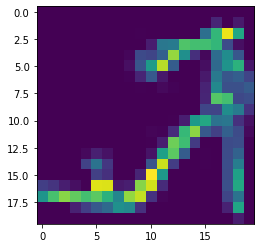

In [ ]:
t=X[8]
m=np.reshape(t,(-1,20))
print(m.shape)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
im = ax.imshow(m)

The input is reshaped to have (20,20,1) shape in order to feed to the CNN

In [ ]:
img_rows, img_cols = 20, 20
input_shape = (img_rows, img_cols, 1)

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')


Normalizing the input

In [ ]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

Building the CNN with given specifications

In [ ]:


batch_size = 64
num_classes = 7
epochs = 50

#input image dimensions
img_rows, img_cols = 20, 20

model = Sequential()
model.add(Lambda(standardize, input_shape=(20,20,1)))
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

The given CNN model is trained on the training set to get 91.84% accuracy

In [ ]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 11s 327us/step - loss: 0.7201 - accuracy: 0.7088 - val_loss: 0.4472 - val_accuracy: 0.8223
Epoch 2/50
33600/33600 [==============================] - 5s 148us/step - loss: 0.4711 - accuracy: 0.8155 - val_loss: 0.3598 - val_accuracy: 0.8599
Epoch 3/50
33600/33600 [==============================] - 5s 147us/step - loss: 0.4061 - accuracy: 0.8482 - val_loss: 0.3348 - val_accuracy: 0.8688
Epoch 4/50
33600/33600 [==============================] - 5s 146us/step - loss: 0.3810 - accuracy: 0.8573 - val_loss: 0.3082 - val_accuracy: 0.8848
Epoch 5/50
33600/33600 [==============================] - 5s 145us/step - loss: 0.3546 - accuracy: 0.8657 - val_loss: 0.2939 - val_accuracy: 0.8857
Epoch 6/50
33600/33600 [==============================] - 5s 146us/step - loss: 0.3383 - accuracy: 0.8711 - val_loss: 0.3044 - val_accuracy: 0.8856
Epoch 7/50
33600/33600 [==============================] - 5s 1

The accuracy and loss of both validation and training data is plotted against the number of epochs.

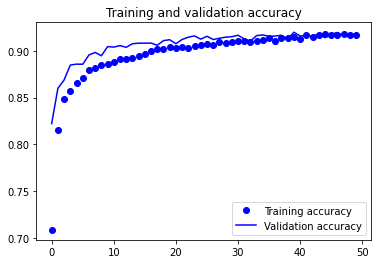

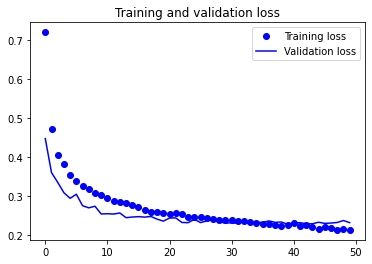

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Finally the model is trained on entire training data to get best results.

In [ ]:
X = X.reshape(X.shape[0], img_rows, img_cols, 1)

X = X.astype('float32')

final_model=model.fit(X, y,
          batch_size=batch_size,
          epochs=50,verbose=1)

Epoch 1/50
42000/42000 [==============================] - 6s 139us/step - loss: 0.2323 - accuracy: 0.9130
Epoch 2/50
42000/42000 [==============================] - 6s 136us/step - loss: 0.2317 - accuracy: 0.9128
Epoch 3/50
42000/42000 [==============================] - 6s 137us/step - loss: 0.2302 - accuracy: 0.9131
Epoch 4/50
42000/42000 [==============================] - 6s 138us/step - loss: 0.2249 - accuracy: 0.9145
Epoch 5/50
42000/42000 [==============================] - 6s 137us/step - loss: 0.2257 - accuracy: 0.9153
Epoch 6/50
42000/42000 [==============================] - 6s 136us/step - loss: 0.2231 - accuracy: 0.9140
Epoch 7/50
42000/42000 [==============================] - 6s 137us/step - loss: 0.2207 - accuracy: 0.9160
Epoch 8/50
42000/42000 [==============================] - 6s 137us/step - loss: 0.2191 - accuracy: 0.9172
Epoch 9/50
42000/42000 [==============================] - 6s 136us/step - loss: 0.2198 - accuracy: 0.9170
Epoch 10/50
42000/42000 [=====================

Predictions are generated on the model and saved in txt file

In [ ]:
predicted_classes = model.predict_classes(X_test)
print(predicted_classes)
np.savetxt("test_labels.txt", predicted_classes, delimiter='\n', fmt='%2.0f')

[6 3 5 ... 6 6 1]
